# Perkenalan

=======================================================

Nama    : Muchammad Septyo Al Birqi Purnama<br>
Tableau : https://public.tableau.com/views/MovieAnalysis_17273669960380/Dashboard1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link


Notebook kali ini dibuat untuk analisis data sebagai bahan pembuatan rencana bisnis sewa film pada platform online

=======================================================


# Daftar Library dan Modul yang digunakan
Dikarenakan pada notebook ini akan dilakukan analisis data, maka kita perlu memanggil beberapa modul berikut

In [1]:
# Daftar Library dan Modul
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from pandasql import sqldf

# Identifikasi Masalah

Pada kesempatan ini saya bekerja sama dengan salah satu perusahaan sewa film online yang ada di Indonesia. Mereka sedang mengembangkan rencana satu tahun kedepan mengenai film apa saja yang akan disediakan pada platform online mereka. Dalam penyusunan rencana, mereka memerlukan data untuk menjadi bahan dasar investasi mereka mengenai film-film yang akan didistribusikan di Indonesia. Sehingga, permasalahan ini dapat saya tuangkan ke dalam Framework SMART:

## SMART : 
- Specific  : Membuat rencana distribusi film berdasarkan data
- Measurable: Pendapatan mencapai 100 juta rupiah pada tahun 2025
- Achievable: Dengan rencana yang tepat, target ini dapat dicapai
- Relevant  : Film yang disukai costumer akan menghasilkan pendapatan yang lebih besar
- Time-Bound: Target ini akan dicapai pada akhir 2025

## Problem Statement:
Tujuan utama adalah membuat rencana film apa saja yang dapat disediakan untuk disewa oleh consumer secara online, dengan target pendapatan 100 juta rupiah pada tahun 2025, dengan memperhatikan antara kesuksesan film tersebut secara ekonomi (dilihat dari keuntungan yang diraih), serta nilai yang diberikan oleh consumer yang diambil dari IMBD (International Movie Database). Data ini juga akan membandingkan antara score IMDB dengan rating, negara asal, dan tahun pembuatan (mengingat film lawas kini mulai kembali masuk ke dalam pop culture). Dengan menyediakan film yang disukai oleh consumer, maka target pemasukan akan tercapai.

## Analisis 5W + 1H
- Apakah ada korelasi antara Score IMDB dan Pendapatan dari film?
- Genre apa yang lebih disukai consumer?
- Production House mana yang lebih diminati consumer?
- Adakah negara yang menjadi favorit consumer?
- Film dari Tahun mana yang lebih disukai consumer?
- Bagaimana rencana pengembangan rencana paltform selama tahun 2025?

# Data Loading
Data pada analisis ini diambil dari 'https://www.kaggle.com/datasets/danielgrijalvas/movies'<br>
Data ini berisi informasi mendetail mengenai film, termasuk reating, genre, tanggal rilis, score IMDB, dan lain lain.<br>
Total data terdiri dari 7.668 Baris dan 15 kolom.

Berikut adalah data yang digunakan:

In [2]:
# Memanggil data ('movies.csv)
df = pd.read_csv('movies.csv')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


Dapat dilihat data ini memuat 7.668 Baris dan 15 Kolom. Namun, melansir detail data dari kaggel, data tersebut memiliki missing value berkisar 3% pada kolom rating, country dan gross(keuntungan), sehingga data missing value akan dihapus dan bukan diganti (misal diganti '0'). Selain itu, data yang dianalisis hanya pada 7 Kolom saja, yaitu name (judul film), genre, year (tahun rilis), score (nilai review IMDB), country (negara asal), gross(keuntungan), dan company (perusahaan / PH). Sehingga pada langkah selanjutnya kita akan lakukan cleaning data agar data yang digunakan untuk analisis bisa lebih sesuai.

# Data Cleaning

Setelah data berhasil muncul, kini kita lakukan cleaning agar data lebih sesuai dengan data yang akan dipakai. Pertama-tama kita buat tabel baru yang berisi kolom yang kita butuhkan.

In [3]:
# Membuat Tabel yang sesuai kebutuhan
movies = df[['name','genre','year','score','country','company','gross']]
movies

,name,genre,year,score,country,company,gross
0,The Shining,Drama,1980,8.4,United Kingdom,Warner Bros.,46998772.0
1,The Blue Lagoon,Adventure,1980,5.8,United States,Columbia Pictures,58853106.0
2,Star Wars: Episode V - The Empire Strikes Back,Action,1980,8.7,United States,Lucasfilm,538375067.0
3,Airplane!,Comedy,1980,7.7,United States,Paramount Pictures,83453539.0
4,Caddyshack,Comedy,1980,7.3,United States,Orion Pictures,39846344.0
...,...,...,...,...,...,...,...
7663,More to Life,Drama,2020,3.1,United States,NaN,NaN
7664,Dream Round,Comedy,2020,4.7,United States,Cactus Blue Entertainment,NaN
7665,Saving Mbango,Drama,2020,5.7,United States,Embi Productions,NaN
7666,It's Just Us,Drama,2020,NaN,United States,NaN,NaN


Sekarang kita memiliki tabel movies yang terdiri dari 7668 baris dan 7 kolom. Langkah selanjutnya adalah kita menghapuskan baris data yang berisi missing value, mengingat kita tidak bisa mengganti value tersebut dengan '0'

In [4]:
# Menghapus missing value
movies = movies.dropna()
movies

,name,genre,year,score,country,company,gross
0,The Shining,Drama,1980,8.4,United Kingdom,Warner Bros.,46998772.0
1,The Blue Lagoon,Adventure,1980,5.8,United States,Columbia Pictures,58853106.0
2,Star Wars: Episode V - The Empire Strikes Back,Action,1980,8.7,United States,Lucasfilm,538375067.0
3,Airplane!,Comedy,1980,7.7,United States,Paramount Pictures,83453539.0
4,Caddyshack,Comedy,1980,7.3,United States,Orion Pictures,39846344.0
...,...,...,...,...,...,...,...
7652,The Eight Hundred,Action,2020,6.8,China,Beijing Diqi Yinxiang Entertainment,461421559.0
7653,The Quarry,Crime,2020,5.4,United States,Prowess Pictures,3661.0
7655,Legend of Deification,Animation,2020,6.6,China,Beijing Enlight Pictures,240663149.0
7656,Tulsa,Comedy,2020,5.0,United States,Pryor Entertainment,413378.0


Kita sudah menghapus data yang berisi missing value. Selanjutnya yang kita perlu lakukan adalah pengecekan data yang terduplikasi. Datta yang terduplikasi akan mengganggu proses analisa, sehingga data tersebut perlu dihapus, namun yang dihapus adalah yang terduplikasi utuh dalam satu baris, hal ini memungkinkan judul film yang sama muncul dalam 2 baris asal data lain (misal tahun) berbeda, hal ini dapat terjadi karena beberapa tahun ke belakang sedang marak film yang di remake.

In [5]:
# Menghapus duplikasi data
movies = movies.drop_duplicates()
movies

,name,genre,year,score,country,company,gross
0,The Shining,Drama,1980,8.4,United Kingdom,Warner Bros.,46998772.0
1,The Blue Lagoon,Adventure,1980,5.8,United States,Columbia Pictures,58853106.0
2,Star Wars: Episode V - The Empire Strikes Back,Action,1980,8.7,United States,Lucasfilm,538375067.0
3,Airplane!,Comedy,1980,7.7,United States,Paramount Pictures,83453539.0
4,Caddyshack,Comedy,1980,7.3,United States,Orion Pictures,39846344.0
...,...,...,...,...,...,...,...
7652,The Eight Hundred,Action,2020,6.8,China,Beijing Diqi Yinxiang Entertainment,461421559.0
7653,The Quarry,Crime,2020,5.4,United States,Prowess Pictures,3661.0
7655,Legend of Deification,Animation,2020,6.6,China,Beijing Enlight Pictures,240663149.0
7656,Tulsa,Comedy,2020,5.0,United States,Pryor Entertainment,413378.0


Proses cleaning data telah selesai dilakukan. Sekarang Tabel yang kita gunakan terdiri dari 7.468 baris dan 7 kolom, data ini lebih sesuai dibandingkan data awal untuk keperluan analisis. Sebelum mulai melakukan analisis, kita coba gali informasi lebih dalam dari data ini.

In [6]:
# cek informasi data
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7468 entries, 0 to 7659
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     7468 non-null   object 
 1   genre    7468 non-null   object 
 2   year     7468 non-null   int64  
 3   score    7468 non-null   float64
 4   country  7468 non-null   object 
 5   company  7468 non-null   object 
 6   gross    7468 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 466.8+ KB


Dari informasi di atas kita menemukan bahwa data sudah tidak memiliki missing value. Semua kolom juga sudah memiliki tipe data yang sesuai. Tipe data pun sudah sesuai sehingga analisis sudah dapat dilakukan. Data juga kita simpan ke dalam file csv untuk dibuat presentasi pada Dashboard.

In [7]:
# save to csv
movies.to_csv('film.csv')

# Analisis Data
## 1. Korelasi Antara Score IMDB dan Pendapatan
Pada bagian ini, kita akan mencari tahu apakah Score dari review di IMBD berpengaruh pada keberhasilan film tersebut. Jika ada korelasi, berarti nantinya kita juga bisa mencari tahu film dengan genre, asal negara, dan tahun rilis mana yang paling berpotensi untuk disewakan pada consumer. Namun sebelum mencari korelasi keduanya, ada baiknya kita cek dulu kondisi data masing-masing

### 1.1 Score IMDB
Score IMDB tercantum pada kolom ['score'] dan merupakan penilaian yang diberikan oleh konsumer terhadap suatu film di 'imbd,com'. Karena sistem scoring ini berdasar review penonton, maka nilai review ini juga bisa menjadi indikator seberapa suka penonton terhadap film tersebut. Berikut kita analisis data Score IMDB

In [8]:
# Analisis Central Tendency Data Score IMDB
print(f'Mean dari Score IMDB adalah: {movies.score.mean():.2f}')
print(f'Median dari Score IMDB adalah: {movies.score.median():.2f}')
print(f'Modus dari Score IMDB adalah: {movies.score.mode().iat[0]}')
print(f'Standar Deviasi dari Score IMDB adalah: {movies.score.std():.2f}')
print(f'Skewness dari Score IMDB adalah: {movies.score.skew():.2f}')
print(f'Kurtosis dari Score IMDB adalah: {movies.score.kurtosis():.2f}')

Mean dari Score IMDB adalah: 6.40
Median dari Score IMDB adalah: 6.50
Modus dari Score IMDB adalah: 6.6
Standar Deviasi dari Score IMDB adalah: 0.96
Skewness dari Score IMDB adalah: -0.61
Kurtosis dari Score IMDB adalah: 0.95


Melihat Central Tendency nya yang berdekatan dapat diasumsikan bahwa data score termasuk normally distributed. Namun jika kita lihat nilai Skewness, maka kita akan mengetahui bahwa data ini tidaklah normaly distributed dan memiliki kecondongan ke kiri.  dan Kurtosis yang sama sama dekat dengan 0. Meski nampaknya ada kecondongan data ke arah kiri. Untuk gambaran, lebih baik melihat grafik di bawah

<Axes: ylabel='Frequency'>

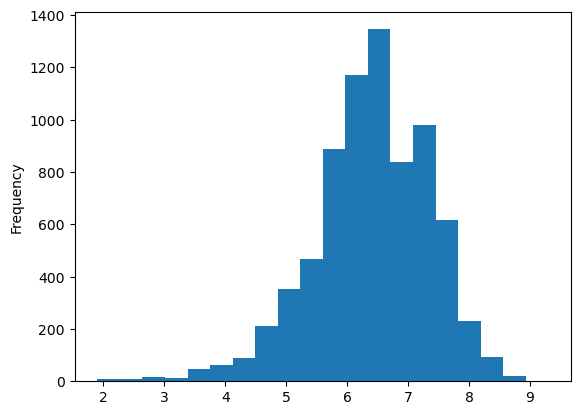

In [9]:
# Untuk menampilkan Chart score
movies.score.plot(kind='hist',bins=20)

### 1.2 Gross (sales)

Setelah menganalisa kolom ['score'] sekarang kita coba analisa kolom ['gross'] yang mewakili pendapatan film tersebut dan bisa digunakan sebagai indikator kesuksesan finansial film tersebut. Metode analisis yang digunakan sama dengan analisis sebelumnya.

In [10]:
# Analisis Central Tendency Data Gross sales
print(f'Mean dari Gross Sales adalah adalah: {movies.gross.mean():.2f}')
print(f'Median dari Gross Sales adalah: {movies.gross.median():.2f}')
print(f'Modus dari Gross Sales adalah: {movies.gross.mode().iat[0]}')
print(f'Standar Deviasi dari Gross Sales adalah: {movies.gross.std():.2f}')
print(f'Skewness dari Gross Sales adalah: {movies.gross.skew():.2f}')
print(f'Kurtosis dari Gross Sales adalah: {movies.gross.kurtosis():.2f}')

Mean dari Gross Sales adalah adalah: 78610072.00
Median dari Gross Sales adalah: 20240315.00
Modus dari Gross Sales adalah: 14000000.0
Standar Deviasi dari Gross Sales adalah: 165822330.69
Skewness dari Gross Sales adalah: 5.31
Kurtosis dari Gross Sales adalah: 45.45


Untuk data pendapatan ini bisa kita lihat bahwa Central Tendencynya tidak berdekatan, sehingga dapat disimpulkan bahwa data ini berbentuk Skewed, ini didukung dengan nilai Skewness nya yang tinggi, karena skewnessnya positif, berarti data ini miring ke kanan. Dengan angka Kurtosis yang sangat tinggi ini, berarti datanya berbentuk leptokurtik, dengan puncak data yang sangat tinggi dan ekor yang tipis. Sebagai gambaran, dapat dilihat grafik berikut

<Axes: ylabel='Frequency'>

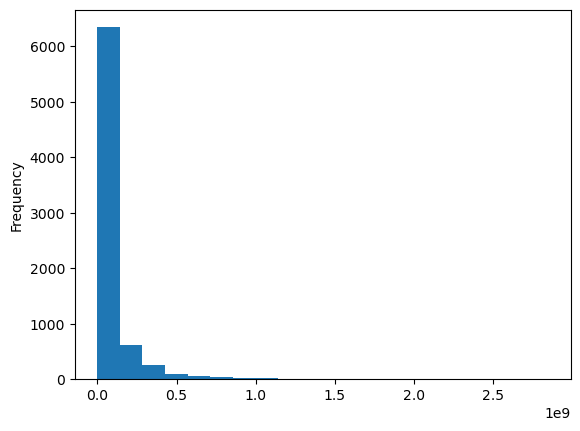

In [11]:
# Untuk menampilkan Chart gross
movies.gross.plot(kind='hist',bins=20)

### Analisis korelasi antara score IMDB dan gross sales

Langkah selanjutnya adalah dengan mengetahui adakah hubungan antara score imdb dan pemasukan kotor film. Untuk mempermudah analisis, kita buat dulu scatterplot dari keduanya 

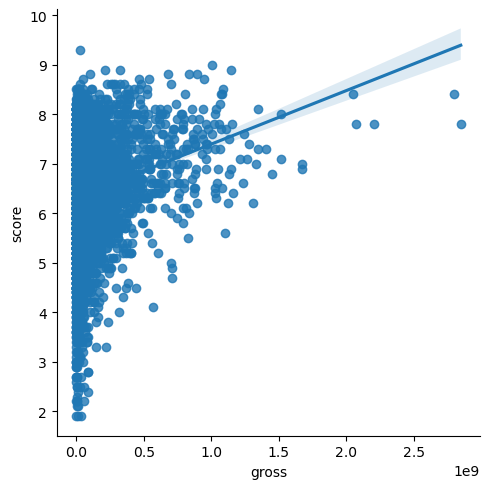

In [12]:
# membuat scatter plot
sns.lmplot(data=movies, x='gross', y="score")

Jika melihat grafik secara sekilas, kita dapat melihat bawha rating tidak selalu sejalan dengan pemasukan suatu film, meskit kita bisa tetap melihat ada kecenderungan korelasi di film film yang mendapat pemasukan yang lebih tinggi. Untuk mendapatkan analisa yang lebih objektif, maka akan dilakukan uji korelasi dengan kriteria:
- H0 : Ada korelasi antara socre dan gross
- H1 : Tidak ada korelasi antara score dan gross

Karena dataset yang kita miliki berbentuk skewed, maka metode analisis koerlasi yang kita gunakan adalah metode spearman

In [13]:
# Analisis Korelasi (Spearman)
corr_rho, pval_s = stats.spearmanr(movies['gross'], movies['score'])   

print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}") 

rho-correlation: 0.13, p-value: 1.862374704635175e-27


Karena p-value (1.86) > Critical Value (0.05), maka H0 gagal di tolak, yang berarti ada korelasi antara pemasukkan dan score IMDB. Yang berarti, film paling potensial untuk disewakan pada consumer adalah film-film dengan score IMDB yang lebih tinggi. Langkah selanjutnya adalah mencari tahu, film-film seperti apa yang lebih diminati, dilihat dari Genre, Production House, Negara Asal, dan Tahun Rilis.

## 2. Genre mana yang lebih disukai consumer?


Sebelum kita menganalisa menganalisa Genre mana yang lebih disukai, kita lihat dulu data Genre yang ada di dalam tabel ini. Untuk melihat ada genre apa saja dan berapa kali genre masuk dalam tabel, kita dapat menggunakan value_counts seperti berikut:

In [14]:
# Memanggil daftar genre beserta jumlahnya
movies['genre'].value_counts()

genre
Comedy       2190
Action       1671
Drama        1463
Crime         542
Biography     432
Adventure     420
Animation     335
Horror        306
Fantasy        43
Mystery        20
Thriller       12
Family         11
Romance         8
Sci-Fi          8
Western         3
Musical         2
Music           1
Sport           1
Name: count, dtype: int64

Untuk menggambarkan persentasenya, akan lebih mudah bila kita buat piechart:

Text(0, 0.5, '')

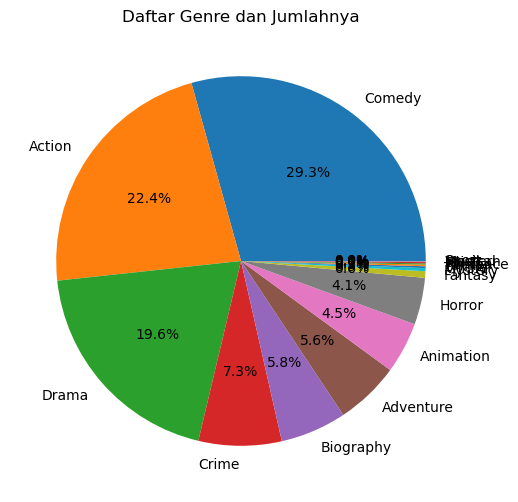

In [15]:
vgenre = movies['genre'].value_counts()
vgenre.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('Daftar Genre dan Jumlahnya')
plt.ylabel('')

Dapat kita lihat pada piechart ini, bahwa Comedy memiliki persentase terbanyak, yaitu 29,4%; disusul dengan action (22,5%) pada posisi kedua; Drama (19,4%) pada posisi ketiga, dan seterusnya. Setelah kita mengetahui jumlah film pada masing-masing genre, kita akan mencari tahu genre mana yang lebih disukai oleh consumer.

In [16]:
# membuat tabel baru dengan menambahkan kolom average score untuk setiap genre
Genre = movies[['genre','score']]
Genre['AvgScr'] = movies['score'].groupby(df['genre']).transform('mean')
# drop kolom score
Genre = Genre.drop(columns='score')
# reset index agar lebih rapi, dan sortir data berdasar Average Score
Genre =Genre.drop_duplicates().sort_values(by='AvgScr', ascending=False).reset_index(drop=True)
Genre

C:\Users\SWIFT\AppData\Local\Temp\ipykernel_23628\1713316183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Genre['AvgScr'] = movies['score'].groupby(df['genre']).transform('mean')


,genre,AvgScr
0,Musical,8.050000
1,Music,7.200000
2,Biography,7.039120
3,Animation,6.772836
4,Drama,6.701230
5,Crime,6.680996
6,Mystery,6.665000
7,Romance,6.500000
8,Sci-Fi,6.387500
9,Family,6.363636


Dari tabel yang berisikan average score di setiap genre di atas, dapat diketahui bahwa genre musical mendapat average score paling tinggi, disusul dengan Music, Biografi, Animation, dan drama untuk Top 5

In [17]:
# membuat tabel baru dengan menambahkan kolom average score untuk setiap genre
GGenre = movies[['genre','gross']]
GGenre['AvgGrs'] = movies['gross'].groupby(df['genre']).transform('mean')
# drop kolom score
GGenre = GGenre.drop(columns='gross')
# reset index agar lebih rapi, dan sortir data berdasar Average Score
GGenre =GGenre.drop_duplicates().sort_values(by='AvgGrs', ascending=False).reset_index(drop=True)
GGenre

C:\Users\SWIFT\AppData\Local\Temp\ipykernel_23628\1385711789.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GGenre['AvgGrs'] = movies['gross'].groupby(df['genre']).transform('mean')


,genre,AvgGrs
0,Animation,2.392300e+08
1,Family,1.961725e+08
2,Action,1.456803e+08
3,Adventure,1.093252e+08
4,Mystery,1.011835e+08
5,Biography,4.797892e+07
6,Horror,4.752706e+07
7,Comedy,4.437010e+07
8,Crime,3.940120e+07
9,Drama,3.904089e+07


Namun, jika kita memanggil data averaga gross sales per genre, maka dapat kita lihat pendapatan film animasi secara rata-rata adalah yang paling menguntungkan, lalu disusul oleh Family dan Action. sementara, music dan musical mendapatkan pendapatan yang rendah. Hal seperti ini bisa terjadi karena beberapa genre bersifat niche, sehingga yang menonton genre tersebut hanya sebagian kecil orang yang memang menyukai genre tersebut, alhasil bisa mendapat rating tinggi meski pemasukannya kecil. Dalam kasus ini, direkomendasikan untuk mengambil yang memiliki peringkat tinggi di kedua kasus (average score dan average gross), sehingga secara genre yang paling menguntungkan adalah : Animation, Biography, dan Mystery

## 3.  Production House mana yang paling berpotensi menguntungkan?

Sebelum kita mencari tahu Production House mana yang paling potensial, mari kita lihat daftar PH nya terlebih dahulu

In [18]:
# daftar dan jumlah film dari masing masing PH
movies['company'].value_counts()

company
Universal Pictures       376
Warner Bros.             333
Columbia Pictures        332
Paramount Pictures       319
Twentieth Century Fox    240
                        ... 
Kanun parvaresh fekri      1
Kuzui Enterprises          1
Q Productions              1
Too Askew Prod. Inc.       1
Pryor Entertainment        1
Name: count, Length: 2275, dtype: int64

Pada dataset ini terdapat 2.275 Production House. sehingga rasanya sulit untuk menampikan piechart. Sehingga kita akan langsung coba buat tabel baru yang berisikan daftar PH beserta rata-rata pemasukan per filmnya.

In [19]:
# membuat tabel baru dengan menambahkan kolom rata rata pemasukkan untuk setiap company
acompany = movies[['company','gross']]
acompany['AvgGrs'] = movies['gross'].groupby(df['company']).transform('mean')
# drop kolom score
acompany = acompany.drop(columns='gross')
# reset index agar lebih rapi, dan sortir data berdasar Average Score
acompany=acompany.drop_duplicates().sort_values(by='AvgGrs', ascending=False).reset_index(drop=True)
acompany

C:\Users\SWIFT\AppData\Local\Temp\ipykernel_23628\2315811419.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acompany['AvgGrs'] = movies['gross'].groupby(df['company']).transform('mean')


,company,AvgGrs
0,Marvel Studios,1.255466e+09
1,Illumination Entertainment,1.097122e+09
2,Fairview Entertainment,9.665549e+08
3,B24,8.806815e+08
4,Avi Arad Productions,8.560852e+08
...,...,...
2270,Process Film,2.037000e+03
2271,Cinema Libre Studio,1.808000e+03
2272,Balboa Entertainment,1.605000e+03
2273,Visual Arts Entertainment,7.900000e+02


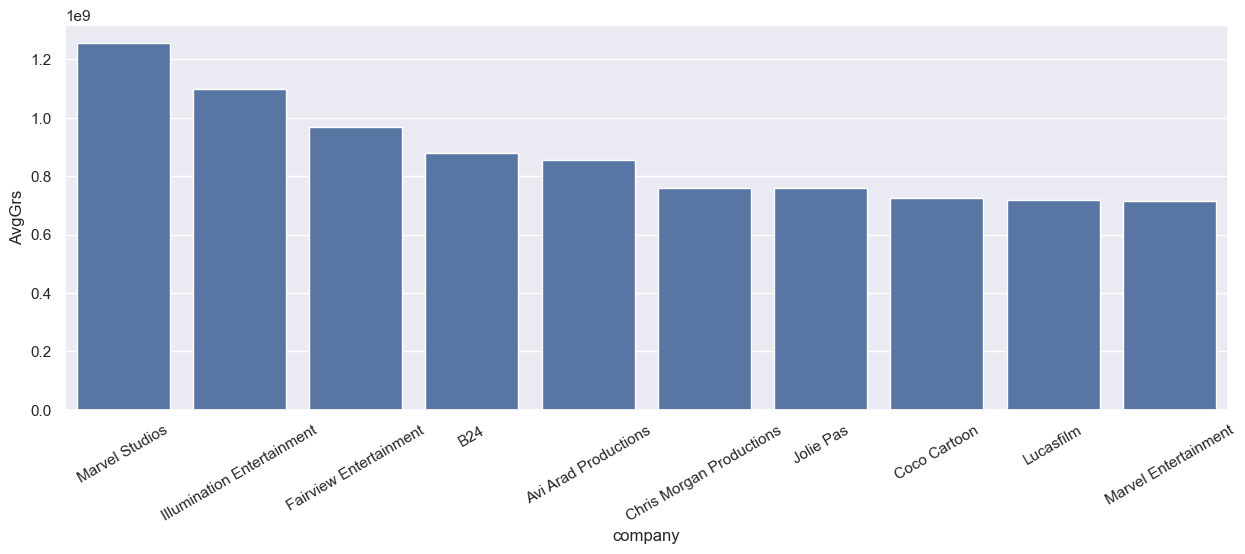

In [34]:
# untuk memudahkan visualisasi data, baris di limit sampai 10
dispcom=sqldf('''SELECT *
      FROM acompany
      LIMIT 10''')

# membuat scatter plot
sns.barplot(data=dispcom, x='company', y="AvgGrs")
plt.xticks(rotation=30)
sns.set_theme(rc={'figure.figsize':(15,5)})

Merujuk pada tabel di atas, Marvel Studios memiliki rata-rata pendapatan per film paling tinggi dibandingkan production house lainnya. Disusul dengan Illumination Entertainment, Fairview Enterntainment, B24, dan Avi Arad Productions. Dikarenakan rata-rata penghasilan per filmnya terbilang tinggi, dapat diartikan bahwa setiap film yang diproduksi oleh ke lima perusahaan tersebut akan laku di pasaran.

## 4 Adakah Negara yang menjadi favorit costumer?

Setelah kita mencari tentang Genre dan Production House, kini kita mencari tahu film dari negara mana yang lebih berpotensi untuk ditawarkan kepada consumer

In [21]:
# Memanggil daftar Negara
movies['country'].value_counts()

country
United States                     5369
United Kingdom                     798
France                             262
Canada                             183
Germany                            116
Australia                           86
Japan                               76
India                               59
Italy                               57
Spain                               44
Ireland                             42
Hong Kong                           40
China                               39
South Korea                         35
Denmark                             31
Sweden                              25
New Zealand                         24
Mexico                              22
Norway                              12
West Germany                        11
Netherlands                         10
Switzerland                         10
Russia                               8
Belgium                              8
Czech Republic                       8
Iran             

Langkah selanjutnya adalah membuat tabel berisi kolom negara dan rata-rata score filmnya

In [22]:
# membuat tabel baru dengan menambahkan kolom average score untuk setiap negara
Country = movies[['country','score']]
Country['AvgScr'] = movies['score'].groupby(df['country']).transform('mean')
# drop kolom score
Country = Country.drop(columns='score')
# reset index agar lebih rapi, dan sortir data berdasar Average Score
Country = Country.drop_duplicates().sort_values(by='AvgScr', ascending=False).reset_index(drop=True)
Country

C:\Users\SWIFT\AppData\Local\Temp\ipykernel_23628\288997637.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Country['AvgScr'] = movies['score'].groupby(df['country']).transform('mean')


,country,AvgScr
0,Lebanon,8.400000
1,Federal Republic of Yugoslavia,8.100000
2,Republic of Macedonia,8.000000
3,Iran,7.950000
4,Romania,7.900000
5,Turkey,7.866667
6,Argentina,7.816667
7,Indonesia,7.800000
8,Taiwan,7.742857
9,Brazil,7.700000


Untuk mempermudah, data mengenai top 10 negara akan diberikan visualisasi data

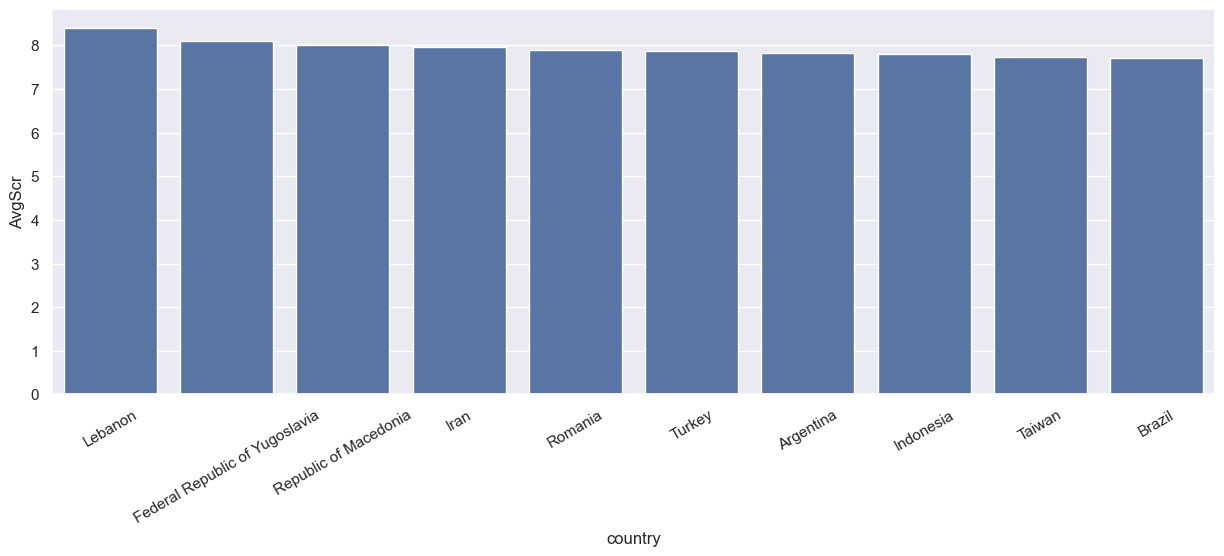

In [35]:
# untuk memudahkan visualisasi data, baris di limit sampai 10
dispneg=sqldf('''SELECT *
      FROM Country
      LIMIT 10''')

# membuat bar plot
sns.barplot(data=dispneg, x='country', y="AvgScr")
plt.xticks(rotation=30)
sns.set_theme(rc={'figure.figsize':(15,5)})

Jika dilihat dari negaranya, Top 5 Negara dengan score per film paling baik adalah:
1. Lebanon
2. Yugoslavia
3. Iran
4. Romania
5. Turki

Film dari kelima negara ini dapat ditambahkan ke dalam koleksi sebagai hidden gem dan dapat ditawarkan sebagai bahan rekomendasi 

## 5 Film dari Tahun mana yang lebih disukai oleh consumer?
Jika kita perhatikan, kini banyak film lawas yang kembali masuk ke dalam Pop Culture. Sehingga, bukan tidak mungkin film-film dari tahun lawas memiliki potensi untuk membawa keuntungan. Maka, kami membagi film menjadi 2 kategori. Film lawas yaitu dari tahun 1980 - tahun 1999 dan film baru dari tahun 2000 -2020

In [24]:
# Membuat list rata-rata score film lawas
lawas = movies[movies['year'] < 2000][['year','score']].groupby('year').mean()
lawas

,score
year,
1980,6.306173
1981,6.350962
1982,6.318487
1983,6.066142
1984,6.194268
1985,6.357627
1986,6.191848
1987,6.252660
1988,6.286387


In [25]:
# Membuat list rata-rata score film baru
baru = movies[movies['year'] > 1999][['year','score']].groupby('year').mean()
baru

,score
year,
2000,6.352041
2001,6.453000
2002,6.359000
2003,6.332500
2004,6.515000
2005,6.363000
2006,6.463819
2007,6.474000
2008,6.383417


Sekarang kita cari rata-rata dari score film lawas dan film baru untuk dibandingkan

In [26]:
# mencari rata-rata score film lama dan baru untuk dibandingkan
print(f'Rata-rata score film lawas adalah: {lawas['score'].mean():.2f}')
print(f'Rata-rata score film baru adalah: {baru['score'].mean():.2f}')

Rata-rata score film lawas adalah: 6.32
Rata-rata score film baru adalah: 6.45


Melihat perbandingan rata-ratanya, nampaknya baik film lawas maupun film baru sama sama disukai. Namun untuk memastikan objektifitas, kita coba gunakan uji hipotesis

In [27]:
# Lakukan uji hipotesis
t_stat, p_val = stats.ttest_ind(lawas['score'], baru['score'])
print('T-statistic:', t_stat)
print('P-value:', p_val/2)

T-statistic: -3.9777707466756236
P-value: 0.00014633017515300851


Karena P-value (0,0001) < Critical value (0,05) maka dapat disimpulkan bahwa kita harus menolak hipotesis 0, yang berarti kesukaan masyarakt terhadap film lawas dan film baru tidaklah sama. Hal ini berarti consumer tetap lebih nmenyukai film baru, melihat dari rata rata score yang lebih tinggi.

## 6 Bagaimana rencana pengembangan platform pada tahun 2025?

Setelah berbagai analisis, kita akan coba membuat beberaoa condidence interval:
1. Genre : Animation
2. Company : Marvel Studios

Perhitungan ini untuk mengukur berapa potensi pendapatan dengan asumsi mendapat 2% dari penjualan kotor

In [28]:
# membuat tabel dengan filter genre hanya animation
cigenre = movies.query('genre == "Animation"')
cigenre

,name,genre,year,score,country,company,gross
71,"Bon Voyage, Charlie Brown (and Don't Come Back!!)",Animation,1980,7.3,United States,Lee Mendelson Film Productions,2013193.0
83,The King and the Mockingbird,Animation,1980,7.9,France,Les Films Paul Grimault,167451.0
117,The Fox and the Hound,Animation,1981,7.3,United States,Walt Disney Animation Studios,63456988.0
223,The Secret of NIMH,Animation,1982,7.6,United States,Aurora,14665733.0
247,The Last Unicorn,Animation,1982,7.4,United Kingdom,Rankin/Bass Productions,6455330.0
...,...,...,...,...,...,...,...
7601,Code Geass: Lelouch of the Re;Surrection,Animation,2019,7.4,Japan,Sunrise,9982083.0
7603,Pilgrim's Progress,Animation,2019,6.1,United States,Cat In The Mill Studio,3173282.0
7632,Saga of Tanya the Evil - The Movie,Animation,2019,7.6,Japan,Studio NuT,288460.0
7647,Onward,Animation,2020,7.4,United States,Walt Disney Pictures,141950608.0


In [29]:
cigenre

,name,genre,year,score,country,company,gross
71,"Bon Voyage, Charlie Brown (and Don't Come Back!!)",Animation,1980,7.3,United States,Lee Mendelson Film Productions,2013193.0
83,The King and the Mockingbird,Animation,1980,7.9,France,Les Films Paul Grimault,167451.0
117,The Fox and the Hound,Animation,1981,7.3,United States,Walt Disney Animation Studios,63456988.0
223,The Secret of NIMH,Animation,1982,7.6,United States,Aurora,14665733.0
247,The Last Unicorn,Animation,1982,7.4,United Kingdom,Rankin/Bass Productions,6455330.0
...,...,...,...,...,...,...,...
7601,Code Geass: Lelouch of the Re;Surrection,Animation,2019,7.4,Japan,Sunrise,9982083.0
7603,Pilgrim's Progress,Animation,2019,6.1,United States,Cat In The Mill Studio,3173282.0
7632,Saga of Tanya the Evil - The Movie,Animation,2019,7.6,Japan,Studio NuT,288460.0
7647,Onward,Animation,2020,7.4,United States,Walt Disney Pictures,141950608.0


Selanjutnya kita dapat melakukan analisis confidence interval 

In [30]:
# Menghitung Confidence Interval
std = cigenre['gross'].std()
N = len(cigenre)

low, up = stats.norm.interval(0.95,loc=cigenre['gross'].mean(), scale = std/np.sqrt(N))

print (f'Potensi Keuntungan Paling rendah adalah, {(low/50):.2f}')
print (f'Potensi Keuntungan Paling tinggi adalah, {(up/50):.2f}')

Potensi Keuntungan Paling rendah adalah, 4175790.38
Potensi Keuntungan Paling tinggi adalah, 5393409.12


Lalu, kita dapat menghitung pula confidence interval keuntungan yang bisa didapat dari PH Marvel Studios

In [31]:
# Membuat tabel khusus Company Marvel Studios
cicompany = movies.query('company == "Marvel Studios"')
cicompany

,name,genre,year,score,country,company,gross
6043,The Avengers,Action,2012,8.0,United States,Marvel Studios,1.518816e+09
6244,Iron Man 3,Action,2013,7.1,United States,Marvel Studios,1.214811e+09
6247,Thor: The Dark World,Action,2013,6.8,United States,Marvel Studios,6.447831e+08
6443,Guardians of the Galaxy,Action,2014,8.0,United States,Marvel Studios,7.733501e+08
6644,Avengers: Age of Ultron,Action,2015,7.3,United States,Marvel Studios,1.402810e+09
6846,Captain America: Civil War,Action,2016,7.8,United States,Marvel Studios,1.153337e+09
6849,Doctor Strange,Action,2016,7.5,United States,Marvel Studios,6.777961e+08
7049,Guardians of the Galaxy Vol. 2,Action,2017,7.6,United States,Marvel Studios,8.637561e+08
7244,Avengers: Infinity War,Action,2018,8.4,United States,Marvel Studios,2.048360e+09
7247,Black Panther,Action,2018,7.3,United States,Marvel Studios,1.347598e+09


In [32]:
# Perhitungan Confidence interval
std = cicompany['gross'].std()
N = len(cicompany)

low, up = stats.norm.interval(0.95,loc=cicompany['gross'].mean(), scale = std/np.sqrt(N))

print (f'Potensi Keuntungan Paling rendah adalah, {(low/50):.2f}')
print (f'Potensi Keuntungan Paling tinggi adalah, {(up)/50:.2f}')

Potensi Keuntungan Paling rendah adalah, 17782856.64
Potensi Keuntungan Paling tinggi adalah, 32435784.73


Maka dapat disimpulkan bahwa potensi keuntungan paling rendah adalah 21.958.647,02 USD dan keuntungan tertingginya adalah 37.829.193,85 USD

# Kesimpulan
Dari seluruh analisa data yang diambil maka dapat disimpulkan bahwa pada 2025, layanan ini lebih baik menawarkan daftar film dengan beberapa kategopri berikut:
1. Genre : Animasi, Biografi, Misteri
2. Production House : Marvel Studios, Illumination Enrtainment, Fairview Enterntainment.
3. Negara-negara berikut dapat ditambahkan sebagai hidden gem: Lebanon, Yugoslavia, Macedonia
4. Film-Film Lawas tidak harus ditambahkan, mengingat tidak ada bukti bahwa consumer menyukai film lawas
5. Setelah dialkukan uji confidence level, dengan hanya menawarkan Genre Animasi dan PH Marvel Studios, maka pendapatan berkisar antara 21.958.647,02 USD sampai 37.829.193,85 USD